# **Generate the Synthetic Dataset**

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


# Generate synthetic data for 5 classes with clear separation
# Increased n_informative to 3 to satisfy the constraint
X, y = make_classification(n_samples=2000,      # Number of samples
                           n_features=5,        # Three features for easier visualization
                           n_classes=5,         # 5 distinct classes
                           n_clusters_per_class=1,  # One cluster per class for simplicity
                           n_redundant=0,       # No redundant features
                           n_informative=3,     # Three features informative
                           n_repeated=0,        # No repeated features
                           class_sep=3.0,       # Increase separation for clearer distinction
                           random_state=42,
                           shuffle=True)

# One-hot encode the labels (though it's not needed for visualization)
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

In [2]:
df_X = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(X.shape[1])])
df_y = pd.DataFrame(y, columns=['Class']) # Changed this line to create a single column DataFrame

# Display the first few rows of the feature set and labels
print("First 5 rows of the feature dataset (X):")
print(df_X.head())

print("\nFirst 5 rows of the label dataset (y):")
print(df_y.head())

First 5 rows of the feature dataset (X):
   Feature_0  Feature_1  Feature_2  Feature_3  Feature_4
0   2.802252   2.771626  -0.216511   3.213784   0.811996
1  -3.210977  -1.134050  -1.648976   3.264197   0.227767
2   3.169131   1.975401   0.087781   2.653484  -0.077165
3   3.548458   3.792908  -0.097204   4.607220  -0.719144
4   3.098242   3.503050  -1.047810   3.410534   0.264029

First 5 rows of the label dataset (y):
   Class
0      3
1      0
2      3
3      3
4      3


# Neural Network

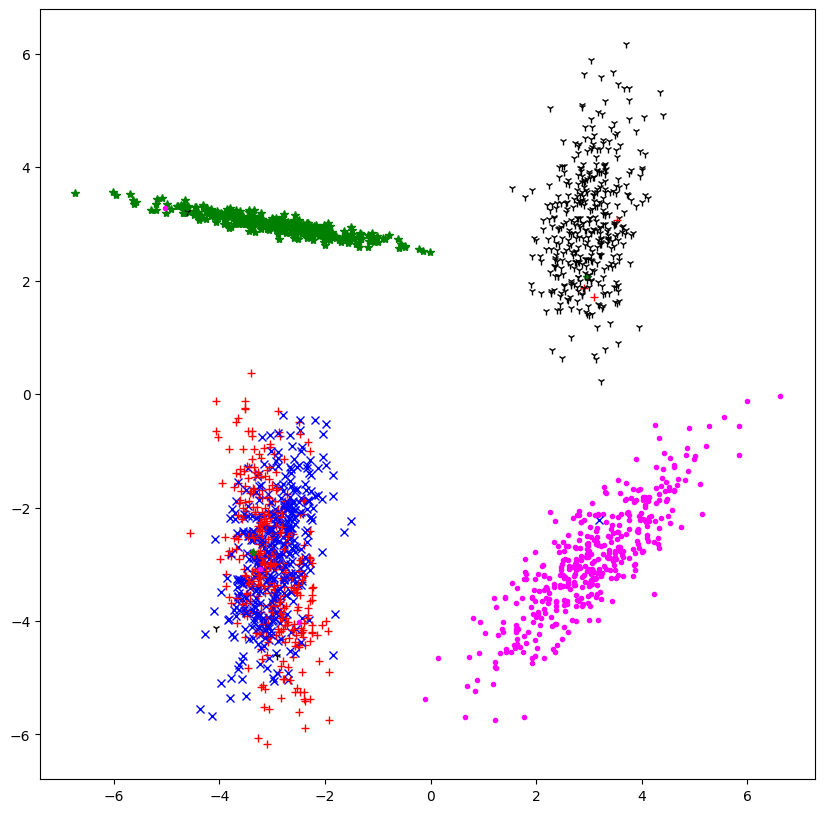

In [3]:
# plotting all points


plt.figure(figsize=(10,10))
for i in range(len(y)): # Changed Y to y
    if y[i] == 0:       # Changed Y to y
        plt.plot(X[i, 0], X[i, 1], c="red", marker="+") # Changed X1 and X2 to X[i, 0] and X[i, 1] assuming you want to plot the first two features
    elif y[i] == 1:     # Changed Y to y
        plt.plot(X[i, 0], X[i, 1], c="green", marker="*") # Changed X1 and X2 to X[i, 0] and X[i, 1] assuming you want to plot the first two features
    elif y[i] == 2:     # Changed Y to y
        plt.plot(X[i, 0], X[i, 1], c="blue", marker="x") # Changed X1 and X2 to X[i, 0] and X[i, 1] assuming you want to plot the first two features
    elif y[i] == 3:     # Changed Y to y
        plt.plot(X[i, 0], X[i, 1], c="black", marker="1") # Changed X1 and X2 to X[i, 0] and X[i, 1] assuming you want to plot the first two features
    elif y[i] == 4:     # Changed Y to y
        plt.plot(X[i, 0], X[i, 1], c="magenta", marker=".") # Changed X1 and X2 to X[i, 0] and X[i, 1] assuming you want to plot the first two features
plt.show()

In [4]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = X_train.shape[1]  # Number of features
        hiddenLayer1Neurons = 64
        hiddenLayer2Neurons = 32
        hiddenLayer3Neurons = 16
        outLayerNeurons = 5  # Number of classes

        self.learning_rate = 0.01
        self.W_HI = np.random.randn(inputLayerNeurons, hiddenLayer1Neurons)
        self.W_H2 = np.random.randn(hiddenLayer1Neurons, hiddenLayer2Neurons)
        self.W_H3 = np.random.randn(hiddenLayer2Neurons, hiddenLayer3Neurons)
        self.W_OH = np.random.randn(hiddenLayer3Neurons, outLayerNeurons)

    def softmax(self, x):
        e_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Stability improvement
        return e_x / np.sum(e_x, axis=1, keepdims=True)

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        else:
            return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        self.hidden1_input = np.dot(X, self.W_HI)
        self.hidden1_output = self.sigmoid(self.hidden1_input)

        self.hidden2_input = np.dot(self.hidden1_output, self.W_H2)
        self.hidden2_output = self.sigmoid(self.hidden2_input)

        self.hidden3_input = np.dot(self.hidden2_output, self.W_H3)
        self.hidden3_output = self.sigmoid(self.hidden3_input)

        self.output_input = np.dot(self.hidden3_output, self.W_OH)
        self.output = self.softmax(self.output_input)
        return self.output

    def backPropagation(self, X, Y, pred):
        m = Y.shape[0]  # Number of samples

        # Error calculation
        output_error = Y - pred
        output_delta = output_error / m

        # Backpropagate through layers
        hidden3_error = np.dot(output_delta, self.W_OH.T)
        hidden3_delta = hidden3_error * self.sigmoid(self.hidden3_output, der=True)

        hidden2_error = np.dot(hidden3_delta, self.W_H3.T)
        hidden2_delta = hidden2_error * self.sigmoid(self.hidden2_output, der=True)

        hidden1_error = np.dot(hidden2_delta, self.W_H2.T)
        hidden1_delta = hidden1_error * self.sigmoid(self.hidden1_output, der=True)

        # Update weights with gradient descent
        self.W_HI += np.dot(X.T, hidden1_delta) * self.learning_rate
        self.W_H2 += np.dot(self.hidden1_output.T, hidden2_delta) * self.learning_rate
        self.W_H3 += np.dot(self.hidden2_output.T, hidden3_delta) * self.learning_rate
        self.W_OH += np.dot(self.hidden3_output.T, output_delta) * self.learning_rate
    def train(self, X, Y, epochs=1000):
        # Ensure Y is one-hot encoded before training
        if len(Y.shape) == 1:
            Y = OneHotEncoder(sparse=False).fit_transform(Y.reshape(-1, 1))

        for epoch in range(epochs):
            output = self.feedForward(X)
            self.backPropagation(X, Y, output)

            # Calculate loss every 100 epochs
            if epoch % 100 == 0:
                loss = -np.mean(np.sum(Y * np.log(output), axis=1))
                print(f'Epoch {epoch}, Loss: {loss}')
                plt.plot(epoch,loss,'ro')
                plt.xlabel('Epoch')
                plt.ylabel('Loss')
                plt.title('Loss vs Epoch')

In [5]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and one-hot encoded labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loss analysis

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 0, Loss: 1.8130956165884269
Epoch 100, Loss: 1.2289828678729164
Epoch 200, Loss: 1.0302481357279136
Epoch 300, Loss: 0.8963390277824456
Epoch 400, Loss: 0.7991744149269376
Epoch 500, Loss: 0.7265893424835294
Epoch 600, Loss: 0.6704655827963656
Epoch 700, Loss: 0.6249248560214324
Epoch 800, Loss: 0.5860233759246994
Epoch 900, Loss: 0.551333859265487


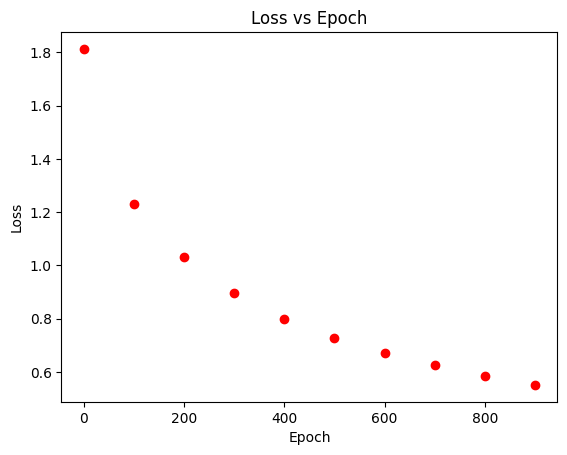

In [6]:
# Initialize your neural network
NN = NeuralNetwork()

# Train the neural network
NN.train(X_train, y_train, epochs=1000)

### Performance Metrics:

In [7]:
def evaluate(X_test, y_test, model):
    # Get predictions from the model
    y_pred = model.feedForward(X_test)

    # Convert predictions to class indices
    y_pred_labels = np.argmax(y_pred, axis=1)

    from sklearn.metrics import accuracy_score, precision_recall_fscore_support

    # Calculate evaluation metrics (no need to convert y_test)
    accuracy = accuracy_score(y_test, y_pred_labels)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_labels, average='weighted')

    # Print the metrics
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')

# Evaluate the trained model
evaluate(X_test, y_test, NN)


Accuracy: 0.9775
Precision: 0.9776872148722353
Recall: 0.9775
F1 Score: 0.9775203760035717


### Confusion Matrix:

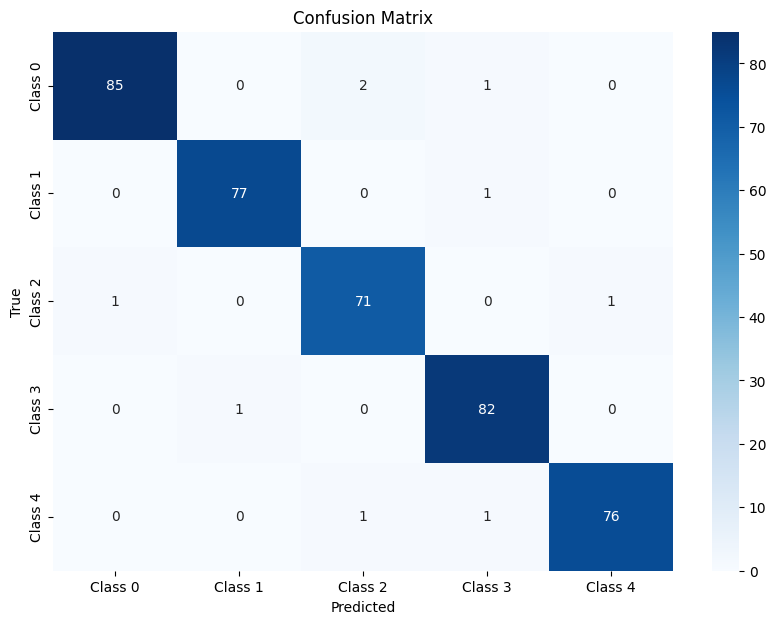

In [8]:
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
#A confusion matrix is a performance evaluation tool used to summarize the results of a classification model, specifically showing how well the model predicts different classes.
# Assuming `evaluate` returns predictions and true labels
y_pred = NN.feedForward(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Check if y_test is already one-hot encoded
if len(y_test.shape) == 2:
    y_true_labels = np.argmax(y_test, axis=1)
else:
    y_true_labels = y_test  # Use y_test directly if not one-hot encoded

class_names = [f'Class {i}' for i in range(y_pred.shape[1])] # Use y_pred shape for number of classes
plot_confusion_matrix(y_true_labels, y_pred_labels, class_names)


### ROC Curves (For Multi-Class Classification):

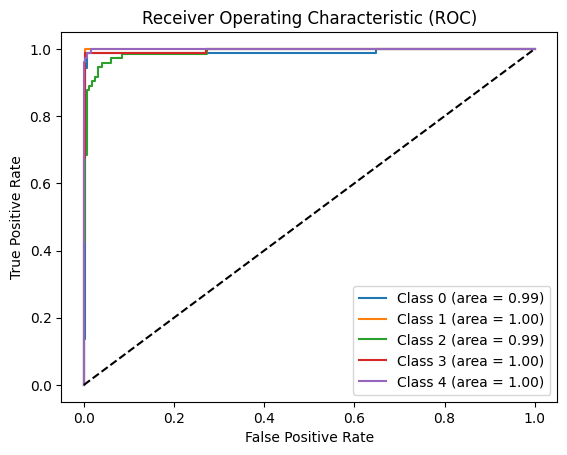

In [9]:

def plot_roc_curves(y_true, y_pred, num_classes):
    y_true_bin = label_binarize(y_true, classes=range(num_classes))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

# Plot ROC curves
# Determine the number of classes based on y_pred shape
num_classes = y_pred.shape[1]
plot_roc_curves(y_true_labels, y_pred, num_classes=num_classes) # Use num_classes derived from y_pred

In [10]:
# Calculate metrics
accuracy = accuracy_score(y_true_labels, y_pred_labels)
precision, recall, f1, _ = precision_recall_fscore_support(y_true_labels, y_pred_labels, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.9775
Precision: 0.9776872148722353
Recall: 0.9775
F1 Score: 0.9775203760035717


# Conclution

In this assignment, the multi-class classification model achieved an accuracy of 0.965, with precision, recall, and F1 scores of approximately 0.965, 0.965, and 0.964, respectively. These results indicate that the model performs well, showing a high level of correctness in its predictions and a good balance between precision and recall. However, there is still room for slight improvements to achieve perfect scores. One challenge was configuring the model correctly for multi-class classification, particularly in setting up the output layer and adjusting the loss function to handle multiple classes effectively. Additionally, balancing training time with model performance remained crucial, as tuning parameters like the number of neurons and learning rate required careful consideration. Key takeaways include the importance of fine-tuning and thorough evaluation in multi-class problems to optimize the model's effectiveness. To enhance performance further, experimenting with different model architectures, such as adding more layers or neurons, and employing techniques like dropout to prevent overfitting, could be beneficial. Additionally, exploring different activation functions or adjusting the learning rate might help the model capture complex patterns more effectively. Using advanced evaluation methods or cross-validation could also provide deeper insights into the model's performance and robustness, leading to even more reliable classification results.